# Patterns

### Libraries

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron

### Data

In [2]:
# load negative, neutral and positive sentiment data

negative_reviews_per_month = pd.read_csv('data/negative_reviews_per_month.csv', index_col=0, parse_dates=True)
neutral_reviews_per_month = pd.read_csv('data/neutral_reviews_per_month.csv', index_col=0, parse_dates=True)
positive_reviews_per_month = pd.read_csv('data/positive_reviews_per_month.csv', index_col=0, parse_dates=True)

In [3]:
# load sentiment per month

sentiment_per_month = pd.read_csv('data/sentiment_per_month.csv', index_col=0, parse_dates=True)

In [4]:
# load category sentiment per month

sentiment_restaurants_per_month = pd.read_csv('data/sentiment_restaurants_per_month.csv', index_col=0, parse_dates=True)
sentiment_nightlife_per_month = pd.read_csv('data/sentiment_nightlife_per_month.csv', index_col=0, parse_dates=True)
sentiment_breakfast_brunch_per_month = pd.read_csv('data/sentiment_breakfast_brunch_per_month.csv', index_col=0, parse_dates=True)

### Lags

In [5]:
def lag_plots(time_series, lags=5, title='Lag Plots'):
    '''
    Plot lag plots for time series data
    '''
    fig, axes = plt.subplots(nrows=1, ncols=lags, figsize=(15, 3))

    for lag in range(1, lags + 1):
        ax = axes[lag - 1]
        lag_plot(time_series, lag=lag, ax=ax)
        ax.set_title(f'Lag {lag}')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

#### Negative, neutral, and positive reviews

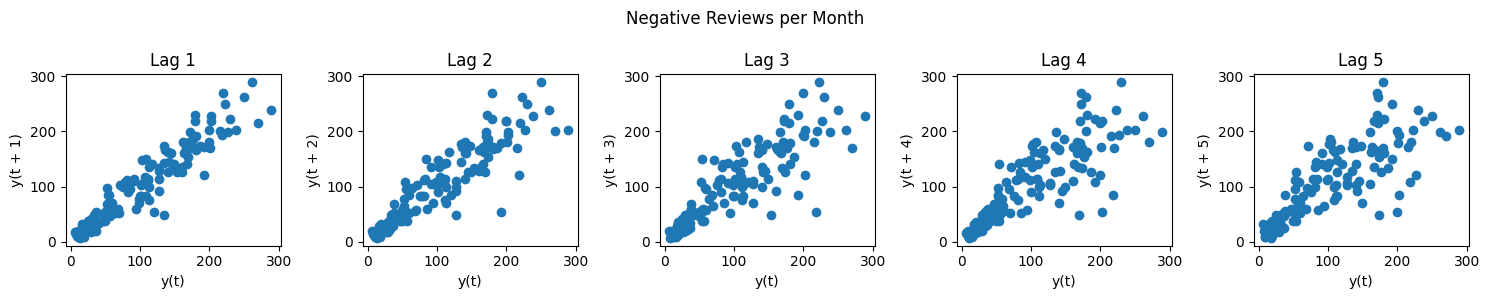

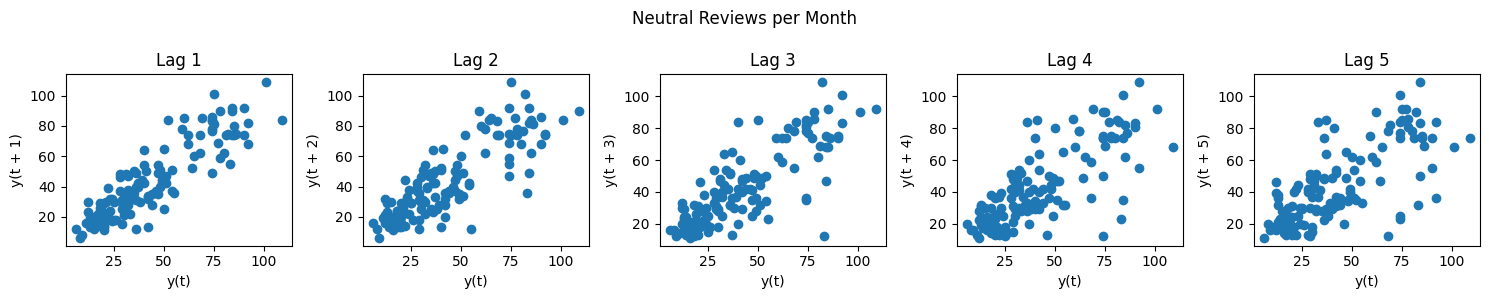

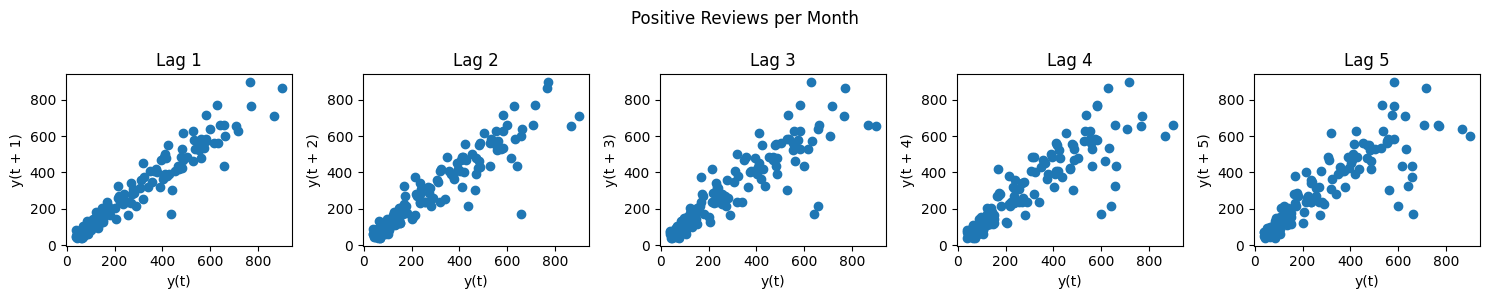

In [6]:
# lag plots for negative, neutral, and positive reviews per month

lag_plots(negative_reviews_per_month, lags=5, title='Negative Reviews per Month')
lag_plots(neutral_reviews_per_month, lags=5, title='Neutral Reviews per Month')
lag_plots(positive_reviews_per_month, lags=5, title='Positive Reviews per Month')

#### Sentiment

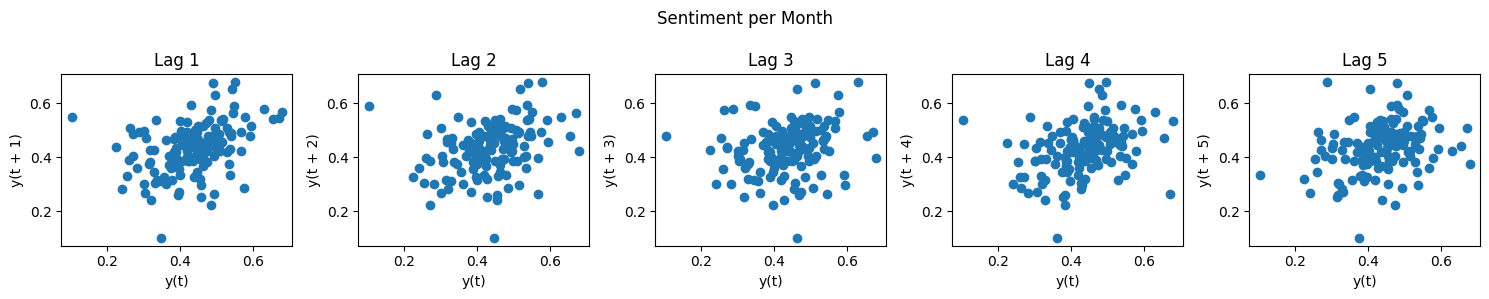

In [7]:
# lag plots for sentiment scores per month

lag_plots(sentiment_per_month, lags=5, title='Sentiment per Month')

#### Category sentiment

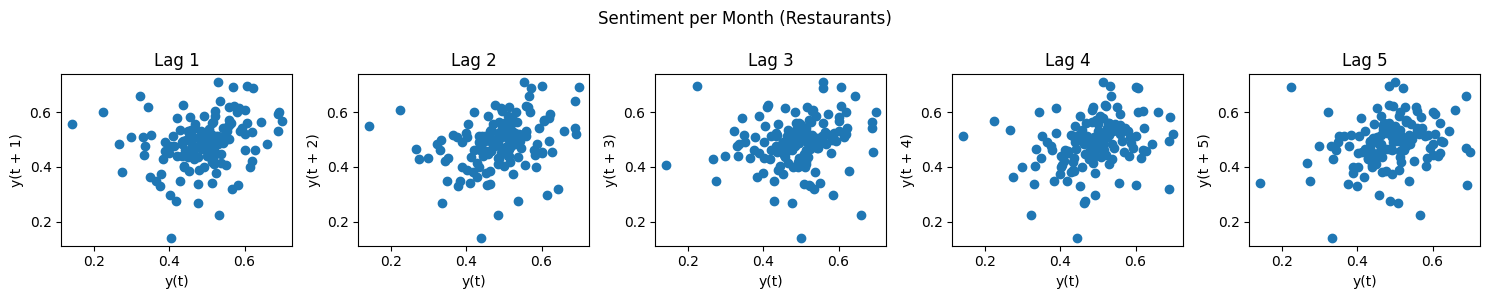

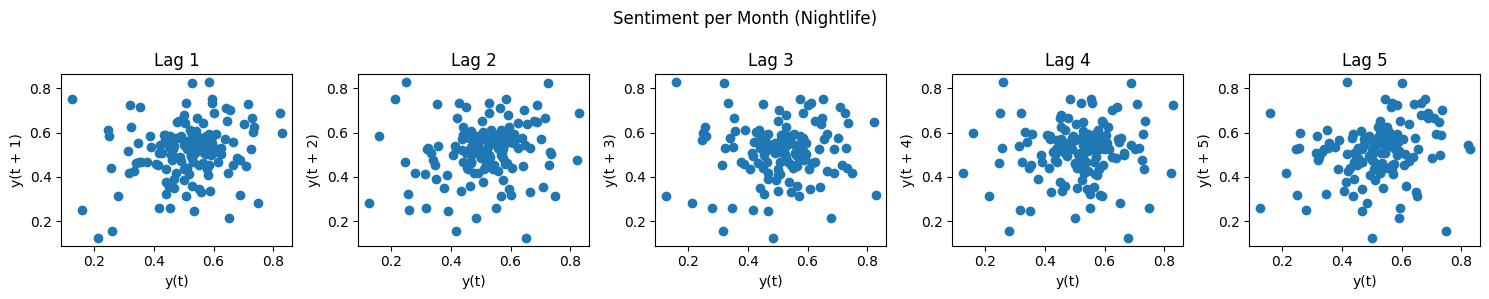

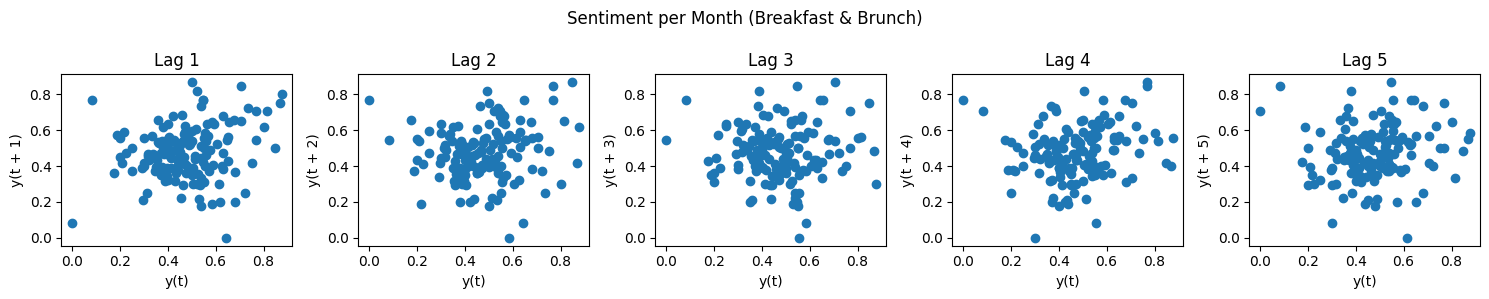

In [8]:
# lag plots for sentiment scores per month per category

lag_plots(sentiment_restaurants_per_month, lags=5, title='Sentiment per Month (Restaurants)')
lag_plots(sentiment_nightlife_per_month, lags=5, title='Sentiment per Month (Nightlife)')
lag_plots(sentiment_breakfast_brunch_per_month, lags=5, title='Sentiment per Month (Breakfast & Brunch)')

### Autocorrelation and partial autocorrelation

In [9]:
def acf_and_pacf_plots(time_series, title='ACF and PACF Plots'):
    '''
    Plot ACF and PACF plots for time series data
    '''
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    plot_acf(time_series, ax=axes[0], lags=40)
    plot_pacf(time_series, ax=axes[1], lags=40)

    axes[0].set_title('ACF')
    axes[1].set_title('PACF')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

#### Negative, neutral, and positive reviews

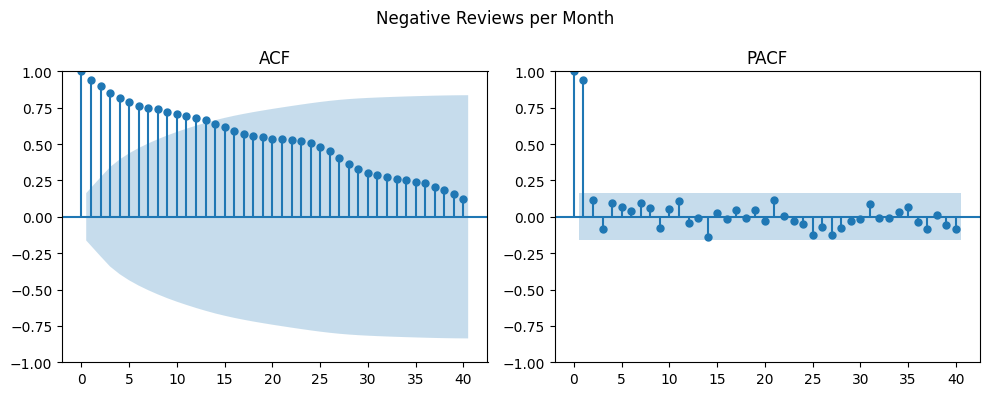

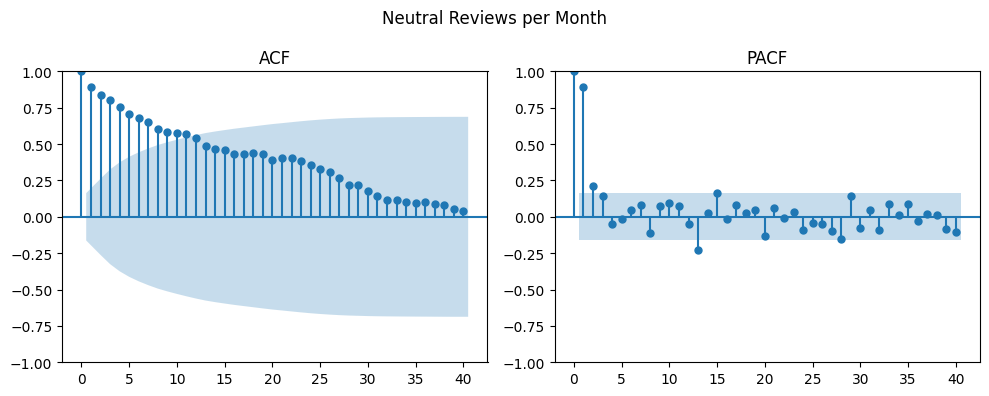

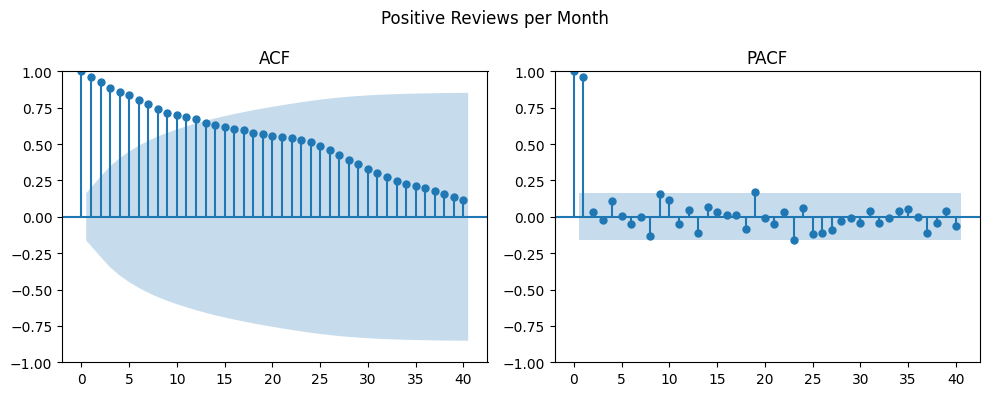

In [10]:
# ACF and PACF plots for negative, neutral, and positive reviews per month

acf_and_pacf_plots(negative_reviews_per_month, title='Negative Reviews per Month')
acf_and_pacf_plots(neutral_reviews_per_month, title='Neutral Reviews per Month')
acf_and_pacf_plots(positive_reviews_per_month, title='Positive Reviews per Month')

### Sentiment

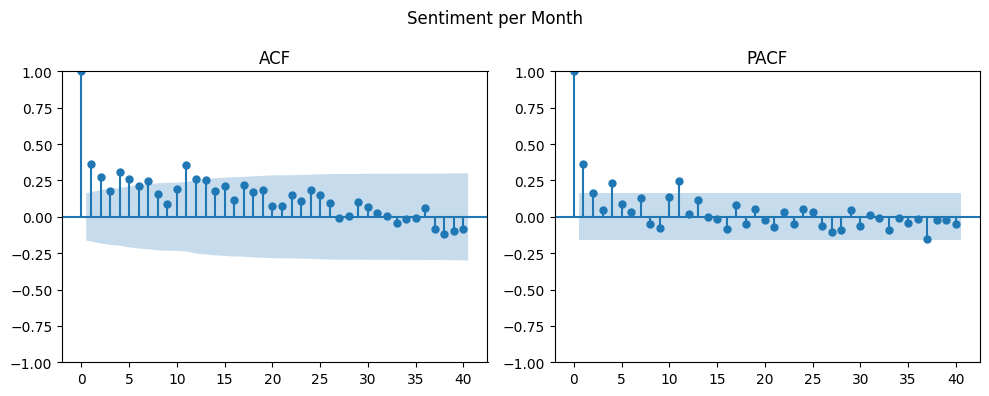

In [11]:
# autocorrelation function for sentiment scores per month

acf_and_pacf_plots(sentiment_per_month, title='Sentiment per Month')

#### Category sentiment

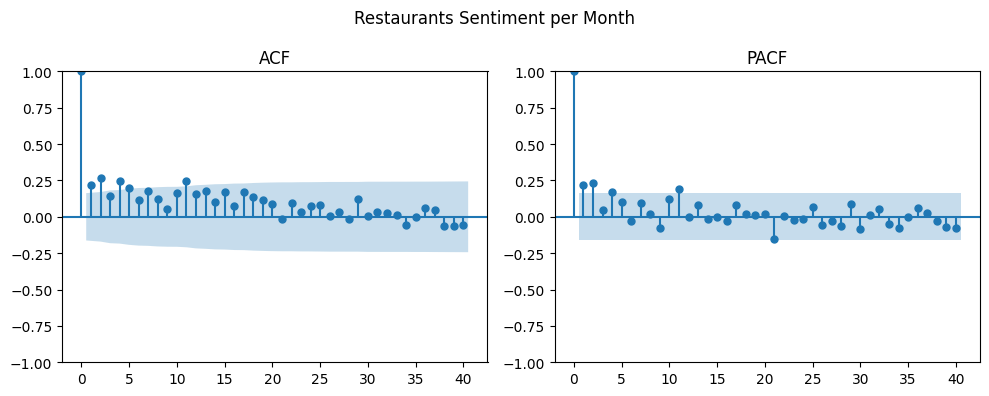

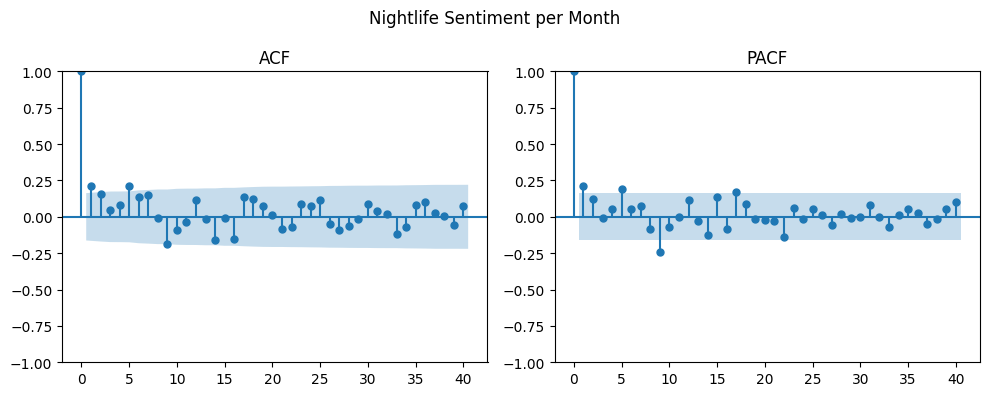

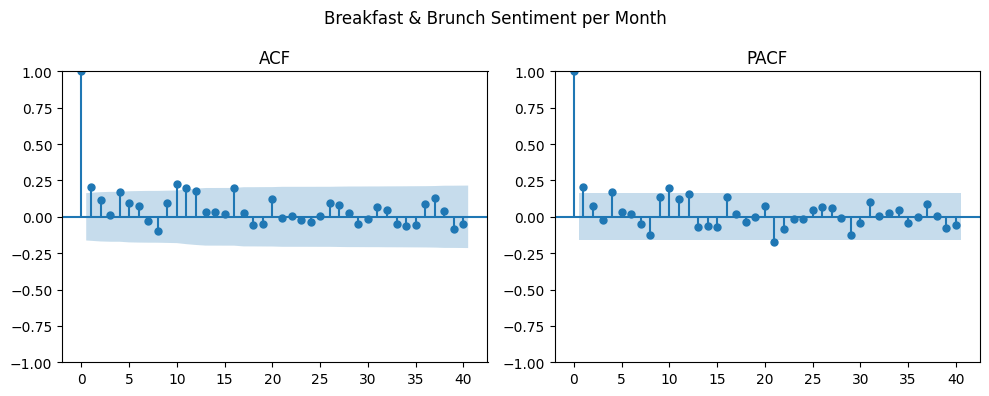

In [12]:
# autocorrelation function for category sentiment scores per month

acf_and_pacf_plots(sentiment_restaurants_per_month, title='Restaurants Sentiment per Month')
acf_and_pacf_plots(sentiment_nightlife_per_month, title='Nightlife Sentiment per Month')
acf_and_pacf_plots(sentiment_breakfast_brunch_per_month, title='Breakfast & Brunch Sentiment per Month')

### Stationarity

In [13]:
def stationarity_adf(time_series, extra_info=False):
    '''
    Check stationarity with Augmented Dickey-Fuller test
    '''
    adf_test = adfuller(time_series, autolag='AIC', regression='ct')
    print("ADF Test Results")
    print(f"p-value: {adf_test[1]}")
    if extra_info:
        print("Null Hypothesis: The series has a unit root (non-stationary)")
        print(f"ADF Statistic: {adf_test[0]}")
        print(f"Used Lags: {adf_test[2]}")
        print(f"Number of Observations: {adf_test[3]}")
        print(f"Critical Values: {adf_test[4]}")
        print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")
    is_stationary = adf_test[1] < 0.05
    print(f"Is the series stationary? {is_stationary}")
    print()

In [14]:
def stationary_kpss(time_series, extra_info=False):
    '''
    Check stationarity with Kwiatkowski-Phillips-Schmidt-Shin test
    '''
    kpss_test = kpss(time_series, regression='ct', nlags='auto')
    print("KPSS Test Results")
    print(f"p-value: {kpss_test[1]}")
    if extra_info:
        print("Null Hypothesis: The series is stationary")
        print(f"KPSS Statistic: {kpss_test[0]}")
        print(f"Used Lags: {kpss_test[2]}")
        print(f"Critical Values: {kpss_test[3]}")
        print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is non-stationary")
        print("Note: Test statistic being outside of the range of p-values available in the lookup table \
            \nindicates very strong evidence against the null hypothesis of stationarity.")
    is_non_stationary = kpss_test[1] < 0.05
    print(f"Is the series non-stationary? {is_non_stationary}")
    print()

In [15]:
def stationary_pp(time_series, extra_info=False):
    '''
    Check stationarity with Phillips-Perron test
    '''
    pp_test = PhillipsPerron(time_series, trend='ct')
    print("Phillips-Perron Test Results")
    print(f"p-value: {pp_test.pvalue}")
    if extra_info:
        print("Null Hypothesis: The series has a unit root (non-stationary)")
        print(f"PP Statistic: {pp_test.stat}")
        print(f"Used Lags: {pp_test.lags}")
        print(f"Critical Values: {pp_test.critical_values}")
        print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")
    is_stationary = pp_test.pvalue < 0.05
    print(f"Is the series stationary? {is_stationary}")
    print()

#### Negative, neutral, and positive reviews

In [16]:
# stationarity tests for negative, neutral, and positive reviews per month

print("Negative Reviews per Month:\n")
stationarity_adf(negative_reviews_per_month)
stationary_kpss(negative_reviews_per_month)
stationary_pp(negative_reviews_per_month)
print('-' * 50)

print("Neutral Reviews per Month:\n")
stationarity_adf(neutral_reviews_per_month)
stationary_kpss(neutral_reviews_per_month)
stationary_pp(neutral_reviews_per_month)
print('-' * 50)

print("Positive Reviews per Month:\n")
stationarity_adf(positive_reviews_per_month)
stationary_kpss(positive_reviews_per_month)
stationary_pp(positive_reviews_per_month)
print('-' * 50)

Negative Reviews per Month:

ADF Test Results
p-value: 0.4578151788648967
Is the series stationary? False

KPSS Test Results
p-value: 0.015264518195733412
Is the series non-stationary? True

Phillips-Perron Test Results
p-value: 0.5449538168677772
Is the series stationary? False

--------------------------------------------------
Neutral Reviews per Month:

ADF Test Results
p-value: 0.5742116914626095
Is the series stationary? False

KPSS Test Results
p-value: 0.02996579191528226
Is the series non-stationary? True

Phillips-Perron Test Results
p-value: 0.030189962891990944
Is the series stationary? True

--------------------------------------------------
Positive Reviews per Month:

ADF Test Results
p-value: 0.3249099686034022
Is the series stationary? False

KPSS Test Results
p-value: 0.07352819707233332
Is the series non-stationary? False

Phillips-Perron Test Results
p-value: 0.31366936300866444
Is the series stationary? False

--------------------------------------------------


In [17]:
# rolling mean and standard deviation for negative, neutral, and positive reviews per month

negative_mean = negative_reviews_per_month.rolling(window=8).mean()
negative_std = negative_reviews_per_month.rolling(window=8).std()

neutral_mean = neutral_reviews_per_month.rolling(window=8).mean()
neutral_std = neutral_reviews_per_month.rolling(window=8).std()

positive_mean = positive_reviews_per_month.rolling(window=8).mean()
positive_std = positive_reviews_per_month.rolling(window=8).std()

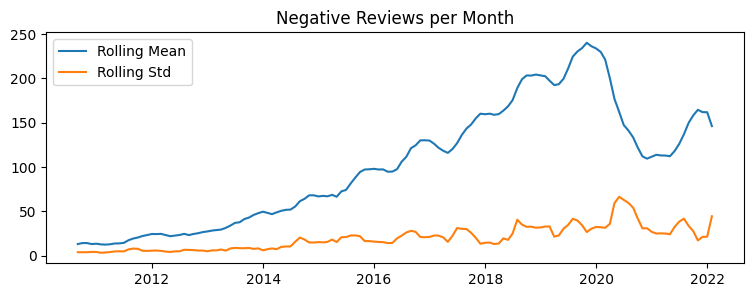

In [18]:
# visualize rolling mean and standard deviation for negative reviews per month

plt.figure(figsize=(9, 3))
plt.plot(negative_mean, label='Rolling Mean')
plt.plot(negative_std, label='Rolling Std')
plt.legend()
plt.title('Negative Reviews per Month')
plt.show()

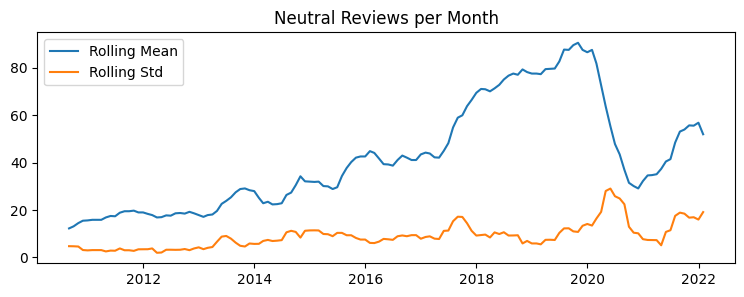

In [19]:
# visualize rolling mean and standard deviation for neutral reviews per month

plt.figure(figsize=(9, 3))
plt.plot(neutral_mean, label='Rolling Mean')
plt.plot(neutral_std, label='Rolling Std')
plt.legend()
plt.title('Neutral Reviews per Month')
plt.show()

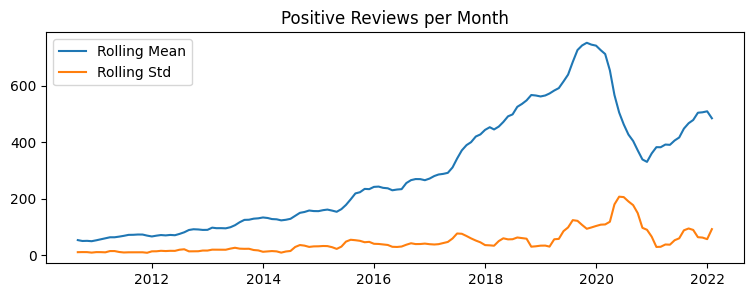

In [20]:
# # visualize rolling mean and standard deviation for positive reviews per month

plt.figure(figsize=(9, 3))
plt.plot(positive_mean, label='Rolling Mean')
plt.plot(positive_std, label='Rolling Std')
plt.legend()
plt.title('Positive Reviews per Month')
plt.show()

#### Sentiment

In [21]:
# stationary tests on sentiment time series

stationarity_adf(sentiment_per_month['sentiment'])
stationary_kpss(sentiment_per_month['sentiment'])
stationary_pp(sentiment_per_month['sentiment'])

ADF Test Results
p-value: 0.71588862913057
Is the series stationary? False

KPSS Test Results
p-value: 0.01
Is the series non-stationary? True

Phillips-Perron Test Results
p-value: 1.5586718802666843e-14
Is the series stationary? True



C:\Users\Utilizador\AppData\Local\Temp\ipykernel_31216\402433061.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(time_series, regression='ct', nlags='auto')


In [22]:
# rolling mean and standard deviation for sentiment scores per month

sentiment_mean = sentiment_per_month['sentiment'].rolling(window=8).mean()
sentiment_std = sentiment_per_month['sentiment'].rolling(window=8).std()

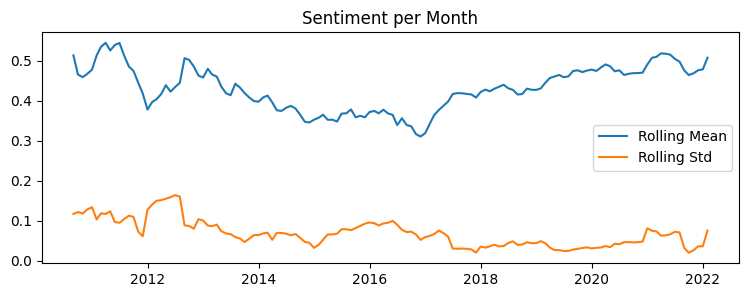

In [23]:
# visualize rolling mean and standard deviation for sentiment scores per month

plt.figure(figsize=(9, 3))
plt.plot(sentiment_mean, label='Rolling Mean')
plt.plot(sentiment_std, label='Rolling Std')
plt.legend()
plt.title('Sentiment per Month')
plt.show()

#### Category sentiment

In [24]:
# stationarity tests on restaurant sentiment time series

stationarity_adf(sentiment_restaurants_per_month['sentiment'])
stationary_kpss(sentiment_restaurants_per_month['sentiment'])
stationary_pp(sentiment_restaurants_per_month['sentiment'])

ADF Test Results
p-value: 0.12422094995573629
Is the series stationary? False

KPSS Test Results
p-value: 0.01
Is the series non-stationary? True

Phillips-Perron Test Results
p-value: 1.666532128815611e-17
Is the series stationary? True



C:\Users\Utilizador\AppData\Local\Temp\ipykernel_31216\402433061.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(time_series, regression='ct', nlags='auto')


In [25]:
# rolling mean and standard deviation for restaurant sentiment scores per month

restaurant_sentiment_mean = sentiment_restaurants_per_month['sentiment'].rolling(window=8).mean()
restaurant_sentiment_std = sentiment_restaurants_per_month['sentiment'].rolling(window=8).std()

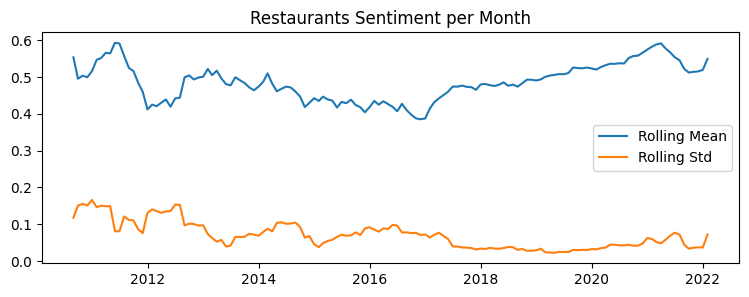

In [26]:
# visualize rolling mean and standard deviation for restaurant sentiment scores per month

plt.figure(figsize=(9, 3))
plt.plot(restaurant_sentiment_mean, label='Rolling Mean')
plt.plot(restaurant_sentiment_std, label='Rolling Std')
plt.legend()
plt.title('Restaurants Sentiment per Month')
plt.show()

In [27]:
# stationarity tests on nightlife sentiment time series

stationarity_adf(sentiment_nightlife_per_month['sentiment'])
stationary_kpss(sentiment_nightlife_per_month['sentiment'])
stationary_pp(sentiment_nightlife_per_month['sentiment'])

ADF Test Results
p-value: 0.008017611497097428
Is the series stationary? True

KPSS Test Results
p-value: 0.01828324497231056
Is the series non-stationary? True

Phillips-Perron Test Results
p-value: 2.02887481542512e-15
Is the series stationary? True



In [28]:
# rolling mean and standard deviation for nightlife sentiment scores per month

nightlife_sentiment_mean = sentiment_nightlife_per_month['sentiment'].rolling(window=8).mean()
nightlife_sentiment_std = sentiment_nightlife_per_month['sentiment'].rolling(window=8).std()

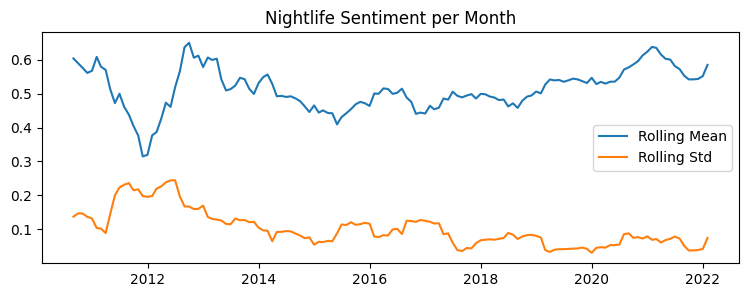

In [29]:
# visualize rolling mean and standard deviation for nightlife sentiment scores per month

plt.figure(figsize=(9, 3))
plt.plot(nightlife_sentiment_mean, label='Rolling Mean')
plt.plot(nightlife_sentiment_std, label='Rolling Std')
plt.legend()
plt.title('Nightlife Sentiment per Month')
plt.show()

In [30]:
# stationarity tests on breakfast & brunch sentiment time series

stationarity_adf(sentiment_breakfast_brunch_per_month['sentiment'])
stationary_kpss(sentiment_breakfast_brunch_per_month['sentiment'])
stationary_pp(sentiment_breakfast_brunch_per_month['sentiment'])

ADF Test Results
p-value: 0.7673308834099972
Is the series stationary? False

KPSS Test Results
p-value: 0.01
Is the series non-stationary? True

Phillips-Perron Test Results
p-value: 4.115118847411862e-16
Is the series stationary? True



C:\Users\Utilizador\AppData\Local\Temp\ipykernel_31216\402433061.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(time_series, regression='ct', nlags='auto')
